# Install the Required Libraries:



In [1]:
!pip install tweepy textblob transformers emoji nltk plotly pandas wordcloud


#Bearer Token

In [2]:
# config.py
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAPEi1AEAAAAAla%2BLmweSrAHEJEb6aK%2Fshitieag%3DcYJVz0Wbg12YStL7AALrz56yFUXG7mklZ4OgMAlNRyg9iJvKZO'


#implement the class for connecting to the Twitter API

In [3]:
import tweepy
from config import BEARER_TOKEN

class TwitterClientV2:
    def __init__(self):
        # Authenticate using the Bearer Token
        self.client = tweepy.Client(bearer_token=BEARER_TOKEN)

    def get_tweets(self, query, count=10):
        tweets = []
        try:
            # Fetching the tweets using Twitter API v2
            response = self.client.search_recent_tweets(query=query, max_results=count)
            for tweet in response.data:
                tweets.append(tweet.text)
        except Exception as e:
            print(f"Error fetching tweets: {e}")
        return tweets


#Data Preprocessing (Text Cleaning)

In [4]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')

def clean_tweet(tweet):
    # Remove URLs, mentions, special characters
    tweet = re.sub(r"(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet)

    # Convert to lowercase and remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    filtered_tweet = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tweet)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Sentiment Analysis (Using Transformers for Advanced Sentiment Analysis)


In [5]:
from transformers import pipeline

# Load pre-trained sentiment analysis model from Hugging Face
sentiment_pipeline = pipeline("sentiment-analysis")

def analyze_sentiment(tweet):
    result = sentiment_pipeline(tweet)
    return result[0]['label'], result[0]['score']  # Label: POSITIVE/NEGATIVE, Score: Confidence


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


In [6]:
!pip install hf_xet

#Emotion Analysis

In [7]:
from textblob import TextBlob

def get_emotion(tweet):
    blob = TextBlob(tweet)
    sentiment = blob.sentiment.polarity
    if sentiment > 0.1:
        return "Positive"
    elif sentiment < -0.1:
        return "Negative"
    else:
        return "Neutral"


#Visualizing Sentiment Distribution and Word Cloud

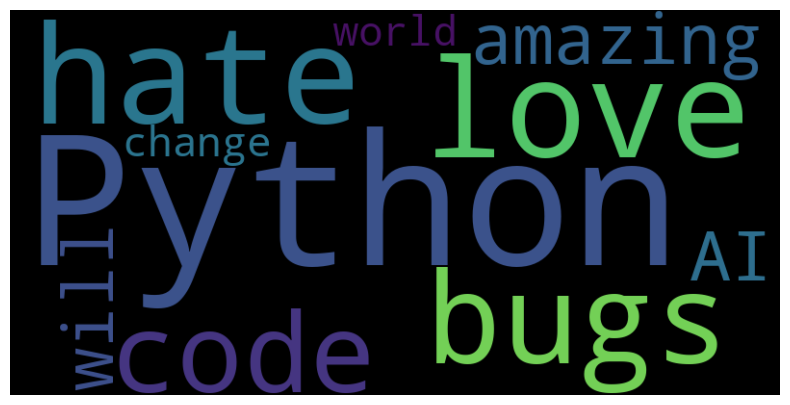

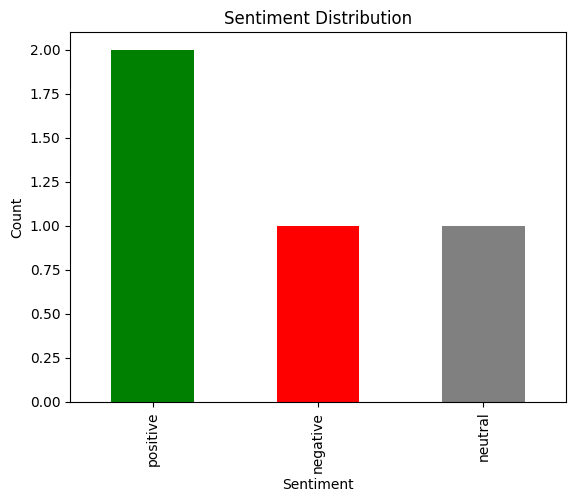

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Sample tweets and sentiment analysis data
tweets = ['I love Python!', 'I hate bugs in my code.', 'Python is amazing!', 'AI will change the world.']
sentiments = ['positive', 'negative', 'positive', 'neutral']

# Create word cloud for all tweets
all_tweets = ' '.join(tweets)
wordcloud = WordCloud(width=800, height=400).generate(all_tweets)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment distribution
df = pd.DataFrame({'Tweet': tweets, 'Sentiment': sentiments})
sentiment_dist = df['Sentiment'].value_counts()

# Plot sentiment distribution
sentiment_dist.plot(kind='bar', title='Sentiment Distribution', color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


#Putting It All Together:

In [9]:
def main():
    # Initialize Twitter client with bearer token
    twitter_client = TwitterClientV2()

    # Get recent tweets about a topic
    tweets = twitter_client.get_tweets('Artificial Intelligence', count=10)

    # Analyze sentiment for each tweet
    for tweet in tweets:
        print(f"Original Tweet: {tweet}")
        sentiment_label, sentiment_score = analyze_sentiment(tweet)
        emotion = get_emotion(tweet)
        print(f"Sentiment: {sentiment_label}, Score: {sentiment_score}")
        print(f"Emotion: {emotion}")
        print('-' * 50)

if __name__ == "__main__":
    main()


Error fetching tweets: 401 Unauthorized
Unauthorized
